In [2]:
import pandas as pd
import numpy as np

In [3]:
file_path = "dataset.csv"
data = pd.read_csv(file_path)

data.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2024,202401,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2024,202402,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2024,202403,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2024,202404,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2024,202405,NaN,NaN,NaN,NaN,NaN


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      2254 non-null   object 
 1   AUSPRAEGUNG                     2254 non-null   object 
 2   JAHR                            2254 non-null   int64  
 3   MONAT                           2254 non-null   object 
 4   WERT                            2086 non-null   float64
 5   VORJAHRESWERT                   2086 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        1924 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  2001 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        1932 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 158.6+ KB
None


In [ ]:
data_filtered = data.drop(data.columns[5:], axis=1)

data_filtered.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2024,202401,NaN
1,Alkoholunfälle,insgesamt,2024,202402,NaN
2,Alkoholunfälle,insgesamt,2024,202403,NaN
3,Alkoholunfälle,insgesamt,2024,202404,NaN
4,Alkoholunfälle,insgesamt,2024,202405,NaN


In [6]:
print(data_filtered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   2254 non-null   object 
 1   AUSPRAEGUNG  2254 non-null   object 
 2   JAHR         2254 non-null   int64  
 3   MONAT        2254 non-null   object 
 4   WERT         2086 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 88.2+ KB
None


In [7]:
print(data_filtered.isnull().sum())

MONATSZAHL       0
AUSPRAEGUNG      0
JAHR             0
MONAT            0
WERT           168
dtype: int64


In [ ]:
print(data_filtered[data_filtered['WERT'].isnull()])

           MONATSZAHL             AUSPRAEGUNG  JAHR   MONAT  WERT
0      Alkoholunfälle               insgesamt  2024  202401   NaN
1      Alkoholunfälle               insgesamt  2024  202402   NaN
2      Alkoholunfälle               insgesamt  2024  202403   NaN
3      Alkoholunfälle               insgesamt  2024  202404   NaN
4      Alkoholunfälle               insgesamt  2024  202405   NaN
...               ...                     ...   ...     ...   ...
1951  Verkehrsunfälle  Verletzte und Getötete  2023  202308   NaN
1952  Verkehrsunfälle  Verletzte und Getötete  2023  202309   NaN
1953  Verkehrsunfälle  Verletzte und Getötete  2023  202310   NaN
1954  Verkehrsunfälle  Verletzte und Getötete  2023  202311   NaN
1955  Verkehrsunfälle  Verletzte und Getötete  2023  202312   NaN

[168 rows x 5 columns]


In [ ]:
data_filtered.columns = data_filtered.columns.str.strip()

# Drop rows with Year > 2022 to remove NULL values
data_filtered = data_filtered[data_filtered['JAHR'] <= 2022]

print(data_filtered['JAHR'].unique())

[2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009
 2008 2007 2006 2005 2004 2003 2002 2001 2000]


In [10]:
print(data_filtered.isnull().sum())

MONATSZAHL     0
AUSPRAEGUNG    0
JAHR           0
MONAT          0
WERT           0
dtype: int64


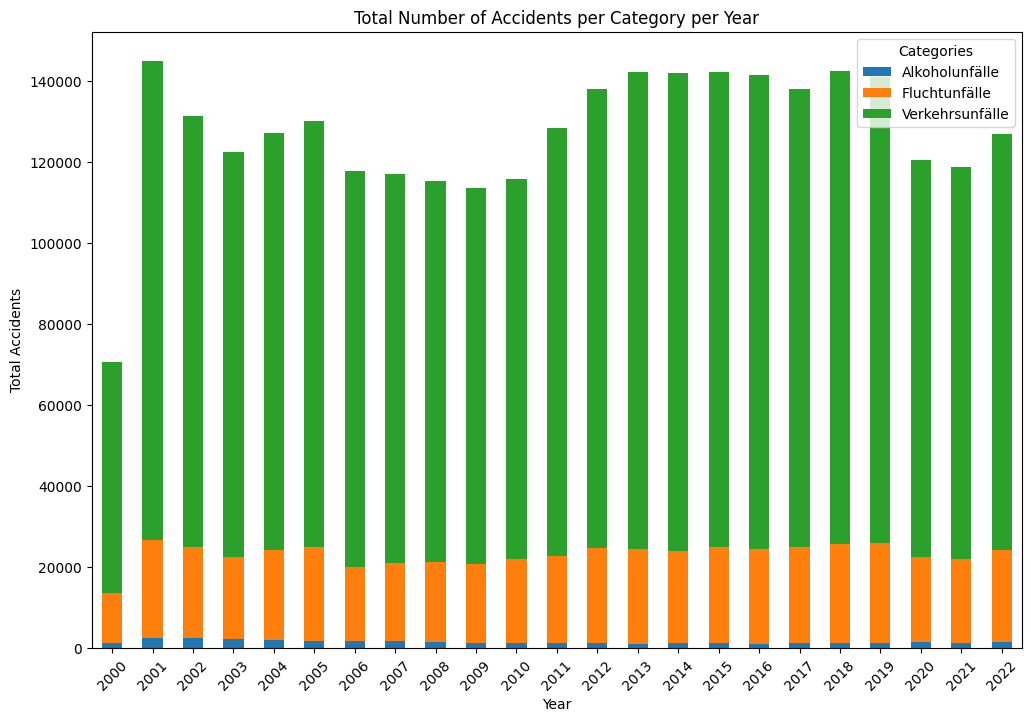

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'MONATSZAHL' and 'JAHR'(year)
annual_data = data_filtered.groupby(['MONATSZAHL', 'JAHR'])['WERT'].sum().reset_index()

annual_pivot = annual_data.pivot(index='JAHR', columns='MONATSZAHL', values='WERT')

annual_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total Number of Accidents per Category per Year')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.xticks(rotation=45)
plt.legend(title='Categories')
plt.savefig('accidents_by_category_bar_plot.png', bbox_inches='tight', dpi=300)
plt.show()


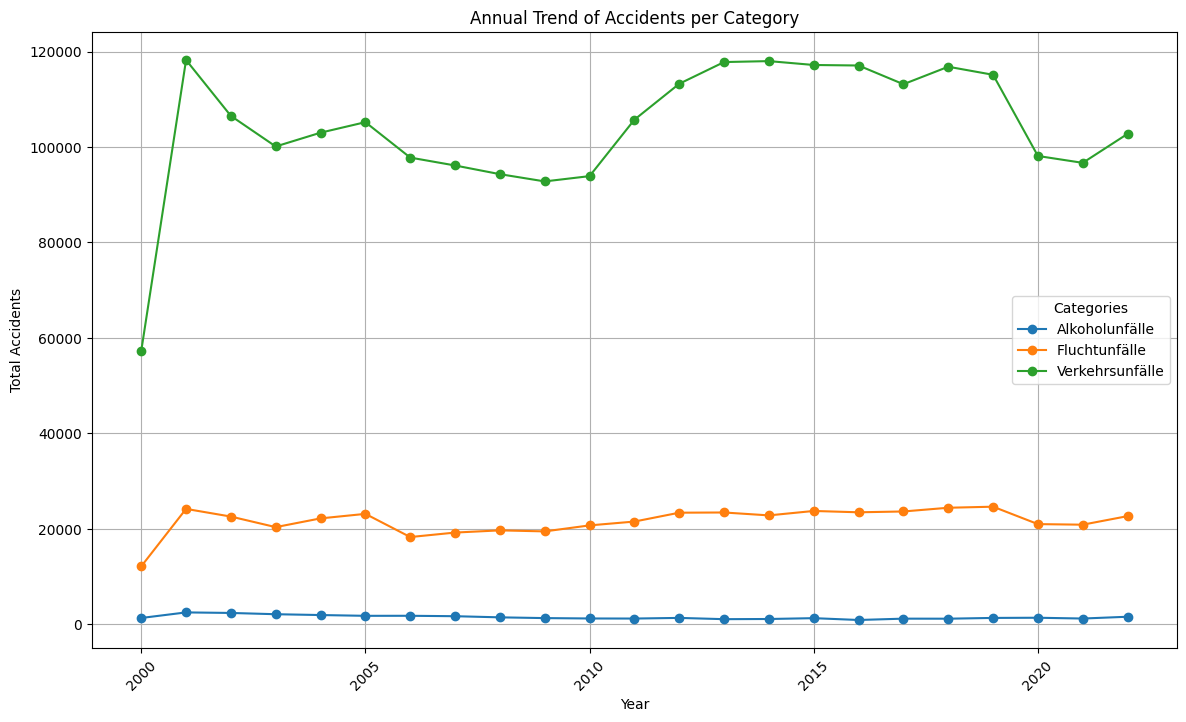

In [ ]:
# Aggregate data by 'MONATSZAHL' (Category) and 'JAHR' (Year)
annual_data = data_filtered.groupby(['MONATSZAHL', 'JAHR']).agg({'WERT': 'sum'}).reset_index()

plt.figure(figsize=(14, 8))

for category in annual_data['MONATSZAHL'].unique():
    category_data = annual_data[annual_data['MONATSZAHL'] == category]
    plt.plot(category_data['JAHR'], category_data['WERT'], label=category, marker='o')

plt.title('Annual Trend of Accidents per Category')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.legend(title='Categories')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('accidents_by_category_per_year_line_plot.png', bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
# Group data by category (MONATSZAHL) and time (MONAT)
grouped_data = data_filtered.groupby(['MONATSZAHL', 'MONAT'])['WERT'].sum().reset_index()

print(grouped_data.head())


       MONATSZAHL   MONAT   WERT
0  Alkoholunfälle  200001  115.0
1  Alkoholunfälle  200002   72.0
2  Alkoholunfälle  200003   91.0
3  Alkoholunfälle  200004  104.0
4  Alkoholunfälle  200005  140.0


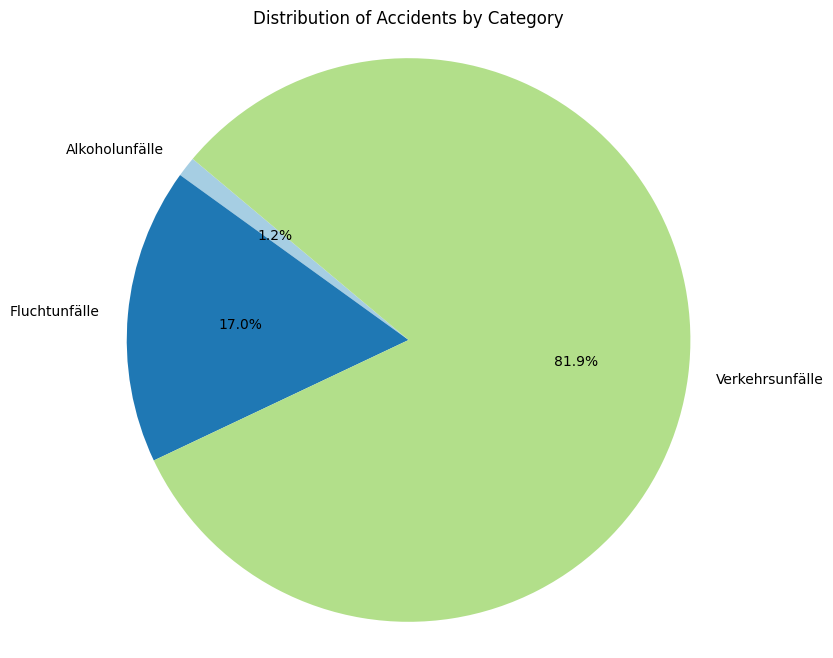

In [ ]:
# Group data by category and sum the accidents (WERT)
category_data = grouped_data.groupby('MONATSZAHL')['WERT'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(category_data['WERT'], labels=category_data['MONATSZAHL'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Accidents by Category')
plt.axis('equal') 
plt.savefig('accidents_by_category_pie_chart.png', bbox_inches='tight', dpi=300)
plt.show()
